# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random
N = 10000 #total number of users (rounds) #Slide step 1
d = 10 #total number of ads
ads_selected = [] #full list of ads selected of rounds
numbers_of_rewards_1 = [0] * d #Ni Number of times the ad i was selected up to round n
numbers_of_rewards_0 = [0] * d #Ri sum of rewards of the ad i up to round n
total_reward = 0 #total rewards accmulated over the rounds with the different ads selected at each round
for n in range (0, N): #round N iterations
    ad = 0 #--> select ad with max UCB
    max_random = 0
    for i in range (0, d): #ads d iterations
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualising the results - Histogram

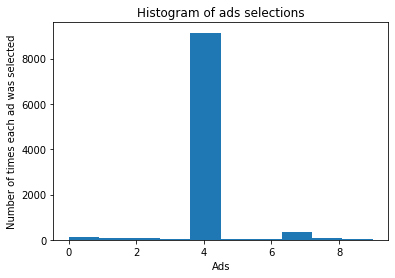

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In Reinforcement Learning, we use Multi-Armed Bandit Problem to formalize the notion of decision-making under uncertainty using k-armed bandits. A decision-maker or agent is present in Multi-Armed Bandit Problem to choose between k-different actions and receives a reward based on the action it chooses. Bandit problem is used to describe fundamental concepts in reinforcement learning, such as rewards, timesteps, and values.

Thompson Sampling (Posterior Sampling or Probability Matching) is an algorithm for choosing the actions that address the exploration-exploitation dilemma in multi-armed bandit problem. Actions are performed several times and are called exploration. It uses training information that evaluates the actions taken rather than instructs by giving correct actions. This is what creates the need for active exploration, for an explicit trial-and-error search for good behaviour. Based on the results of those actions, rewards (1) or penalties (0) are given for that action to the machine. Further actions are performed in order to maximize the reward that may improve future performance.